### Importación de datos



In [19]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [12]:
#Tienda calculo
ingreso_tienda1 = tienda["Precio"].sum()
ingreso_tienda2 = tienda2["Precio"].sum()
ingreso_tienda3 = tienda3["Precio"].sum()
ingreso_tienda4 = tienda4["Precio"].sum()

##Imprimir resultados de cada tienda

print("Ingreso total Tienda 1:", ingreso_tienda1)
print("Ingreso total Tienda 2:", ingreso_tienda2)
print("Ingreso total Tienda 3:", ingreso_tienda3)
print("Ingreso total Tienda 4:", ingreso_tienda4)


     Tienda  Ingreso Total
0  Tienda 1   1.150880e+09
1  Tienda 2   1.116344e+09
2  Tienda 3   1.098020e+09
3  Tienda 4   1.038376e+09
Ingreso total Tienda 1: 1150880400.0
Ingreso total Tienda 2: 1116343500.0
Ingreso total Tienda 3: 1098019600.0
Ingreso total Tienda 4: 1038375700.0


In [56]:
ingresos = pd.DataFrame({
    "Tienda": ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"],
    "Ingreso Total": [ingreso_tienda1, ingreso_tienda2, ingreso_tienda3, ingreso_tienda4]
})
# poner en  comas en miles
ingresos["Ingreso Total"] = ingresos["Ingreso Total"].apply(lambda x: f"${x:,.0f}")

# Ingreso en total de todas
ingreso_global = ingreso_tienda1 + ingreso_tienda2 + ingreso_tienda3 + ingreso_tienda4

print(ingresos)
print("\nIngreso total combinado de todas las tiendas:", f"${ingreso_global:,.0f}")

     Tienda   Ingreso Total
0  Tienda 1  $1,150,880,400
1  Tienda 2  $1,116,343,500
2  Tienda 3  $1,098,019,600
3  Tienda 4  $1,038,375,700

Ingreso total combinado de todas las tiendas: $4,403,619,200


# 2. Ventas por categoría

In [25]:
# Por categoría y ventas en cada tienda que tiene
ventas_tienda1 = tienda.groupby("Categoría del Producto")["Producto"].count().reset_index()
ventas_tienda2 = tienda2.groupby("Categoría del Producto")["Producto"].count().reset_index()
ventas_tienda3 = tienda3.groupby("Categoría del Producto")["Producto"].count().reset_index()
ventas_tienda4 = tienda4.groupby("Categoría del Producto")["Producto"].count().reset_index()

# Renombrar columna para claridad
ventas_tienda1.columns = ["Categoría", "Cantidad de Ventas"]
ventas_tienda2.columns = ["Categoría", "Cantidad de Ventas"]
ventas_tienda3.columns = ["Categoría", "Cantidad de Ventas"]
ventas_tienda4.columns = ["Categoría", "Cantidad de Ventas"]

#  Resultados impresos
print("Ventas por categoría - Tienda 1")
print(ventas_tienda1.sort_values("Cantidad de Ventas", ascending=False))

print("\nVentas por categoría - Tienda 2")
print(ventas_tienda2.sort_values("Cantidad de Ventas", ascending=False))

print("\nVentas por categoría - Tienda 3")
print(ventas_tienda3.sort_values("Cantidad de Ventas", ascending=False))

print("\nVentas por categoría - Tienda 4")
print(ventas_tienda4.sort_values("Cantidad de Ventas", ascending=False))


Ventas por categoría - Tienda 1
                 Categoría  Cantidad de Ventas
7                  Muebles                 465
3             Electrónicos                 448
5                 Juguetes                 324
2        Electrodomésticos                 312
1     Deportes y diversión                 284
4   Instrumentos musicales                 182
6                   Libros                 173
0  Artículos para el hogar                 171

Ventas por categoría - Tienda 2
                 Categoría  Cantidad de Ventas
7                  Muebles                 442
3             Electrónicos                 422
5                 Juguetes                 313
2        Electrodomésticos                 305
1     Deportes y diversión                 275
4   Instrumentos musicales                 224
6                   Libros                 197
0  Artículos para el hogar                 181

Ventas por categoría - Tienda 3
                 Categoría  Cantidad de Ventas
7        

In [21]:
#Categoria mas popular por cada tienda

print("Categoría más popular Tienda 1:", ventas_tienda1.sort_values("Cantidad de Ventas", ascending=False).iloc[0])
print("Categoría más popular Tienda 2:", ventas_tienda2.sort_values("Cantidad de Ventas", ascending=False).iloc[0])
print("Categoría más popular Tienda 3:", ventas_tienda3.sort_values("Cantidad de Ventas", ascending=False).iloc[0])
print("Categoría más popular Tienda 4:", ventas_tienda4.sort_values("Cantidad de Ventas", ascending=False).iloc[0])

Categoría más popular Tienda 1: Categoría             Muebles
Cantidad de Ventas        465
Name: 7, dtype: object
Categoría más popular Tienda 2: Categoría             Muebles
Cantidad de Ventas        442
Name: 7, dtype: object
Categoría más popular Tienda 3: Categoría             Muebles
Cantidad de Ventas        499
Name: 7, dtype: object
Categoría más popular Tienda 4: Categoría             Muebles
Cantidad de Ventas        480
Name: 7, dtype: object


# 3. Calificación promedio de la tienda


In [47]:
# Calcular calificación promedio por tienda
calif_tienda1 = tienda["Calificación"].mean()
calif_tienda2 = tienda2["Calificación"].mean()
calif_tienda3 = tienda3["Calificación"].mean()
calif_tienda4 = tienda4["Calificación"].mean()

In [49]:

# Mostras en solos dos seminales
calificaciones["Calificación Promedio"] = calificaciones["Calificación Promedio"].round(2)

print(calificaciones)

     Tienda  Calificación Promedio
0  Tienda 1                   3.98
1  Tienda 2                   4.04
2  Tienda 3                   4.05
3  Tienda 4                   4.00


# 4. Productos más y menos vendidos

In [57]:
# Producto vendidos y contar las ventas en cada tienda
productos_t1 = tienda.groupby("Producto")["Producto"].count().reset_index(name="Cantidad de Ventas")
productos_t2 = tienda2.groupby("Producto")["Producto"].count().reset_index(name="Cantidad de Ventas")
productos_t3 = tienda3.groupby("Producto")["Producto"].count().reset_index(name="Cantidad de Ventas")
productos_t4 = tienda4.groupby("Producto")["Producto"].count().reset_index(name="Cantidad de Ventas")

# Por cantidad de ventas realizadas
productos_t1 = productos_t1.sort_values("Cantidad de Ventas", ascending=False)
productos_t2 = productos_t2.sort_values("Cantidad de Ventas", ascending=False)
productos_t3 = productos_t3.sort_values("Cantidad de Ventas", ascending=False)
productos_t4 = productos_t4.sort_values("Cantidad de Ventas", ascending=False)


In [58]:
# Más y menos vendido de cada tienda
print("Tienda 1 - Más vendido:", productos_t1.iloc[0])
print("Tienda 1 - Menos vendido:", productos_t1.iloc[-1])

print("\nTienda 2 - Más vendido:", productos_t2.iloc[0])
print("Tienda 2 - Menos vendido:", productos_t2.iloc[-1])

print("\nTienda 3 - Más vendido:", productos_t3.iloc[0])
print("Tienda 3 - Menos vendido:", productos_t3.iloc[-1])

print("\nTienda 4 - Más vendido:", productos_t4.iloc[0])
print("Tienda 4 - Menos vendido:", productos_t4.iloc[-1])

Tienda 1 - Más vendido: Producto              Armario
Cantidad de Ventas         60
Name: 1, dtype: object
Tienda 1 - Menos vendido: Producto              Auriculares con micrófono
Cantidad de Ventas                           33
Name: 4, dtype: object

Tienda 2 - Más vendido: Producto              Iniciando en programación
Cantidad de Ventas                           65
Name: 24, dtype: object
Tienda 2 - Menos vendido: Producto              Juego de mesa
Cantidad de Ventas               32
Name: 26, dtype: object

Tienda 3 - Más vendido: Producto              Kit de bancas
Cantidad de Ventas               57
Name: 27, dtype: object
Tienda 3 - Menos vendido: Producto              Bloques de construcción
Cantidad de Ventas                         35
Name: 9, dtype: object

Tienda 4 - Más vendido: Producto              Cama box
Cantidad de Ventas          62
Name: 10, dtype: object
Tienda 4 - Menos vendido: Producto              Guitarra eléctrica
Cantidad de Ventas                    33


# 5. Envío promedio por tienda

In [60]:
# Costo de envío promedio por tienda
envio_tienda1 = tienda["Costo de envío"].mean()
envio_tienda2 = tienda2["Costo de envío"].mean()
envio_tienda3 = tienda3["Costo de envío"].mean()
envio_tienda4 = tienda4["Costo de envío"].mean()

In [61]:
envios = pd.DataFrame({
    "Tienda": ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"],
    "Costo de Envío Promedio": [envio_tienda1, envio_tienda2, envio_tienda3, envio_tienda4]
})

#poner punto
envios["Costo de Envío Promedio"] = envios["Costo de Envío Promedio"].round(2)

print(envios)

     Tienda  Costo de Envío Promedio
0  Tienda 1                 26018.61
1  Tienda 2                 25216.24
2  Tienda 3                 24805.68
3  Tienda 4                 23459.46


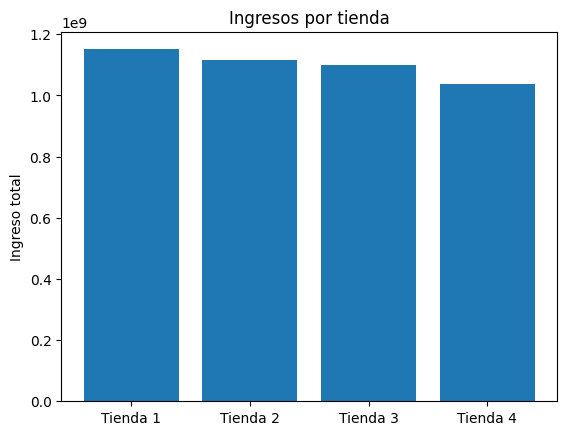

In [63]:
import matplotlib.pyplot as plt

# Datos
tiendas = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]
ingresos = [1150880400.0, 1116343500.0, 1098019600.0, 1038375700.0]

# Gráfico de barras
plt.bar(tiendas, ingresos)
plt.title("Ingresos por tienda")
plt.ylabel("Ingreso total")
plt.show()

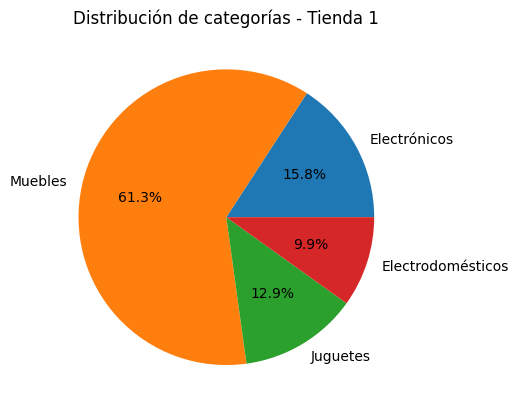

In [64]:
# Datos
categorias_t1 = ["Electrónicos", "Muebles", "Juguetes", "Electrodomésticos"]
ventas_cat_t1 = [120, 465, 98, 75]

# Gráfico de pastel
plt.pie(ventas_cat_t1, labels=categorias_t1, autopct="%1.1f%%")
plt.title("Distribución de categorías - Tienda 1")
plt.show()

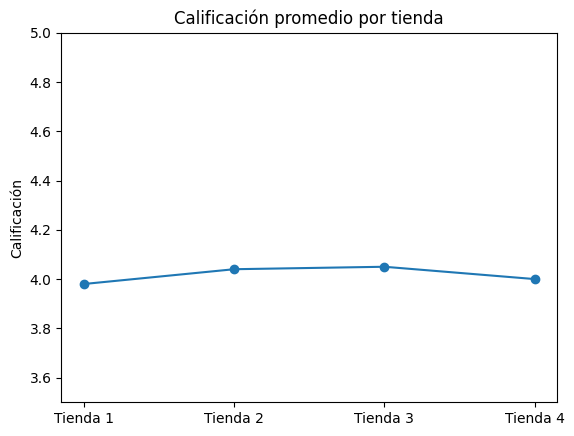

In [65]:
# Datos
calificaciones = [3.98, 4.04, 4.05, 4.00]

# Gráfico de líneas
plt.plot(tiendas, calificaciones, marker="o")
plt.title("Calificación promedio por tienda")
plt.ylabel("Calificación")
plt.ylim(3.5, 5)  # escala de 0 a 5
plt.show()

#informe final de Tiendas


##Este análisis se desarrolló para determinar que tiendas son las mejores que tiene ingresos dentro de su gran variedad de productos que lleva, le cuál conlleva ingresos totales por tienda, satisfacción del cliente por tienda, los productos mejores vendidos y el costo que conlleva

#Resulados de tiendas:


- Tienda 1  $1,150,880,400



- Tienda 2  $1,116,343,500



- Tienda 3  $1,098,019,600



- Tienda 4  $1,038,375,700





R. Tienda 1 tiene mayos ingreso de todas por lo cual deben de poner mayor atención a dicha tienda.



#Respuesta respecto a la categoría más vendida:

De la variedad de productos **Muebles** es la más vendida.



La menos vendida **juguetes o electrónicos**



R. Lo cual indica que se deben de suministrar mayor cantidad de muebles en tiendas y revisar porque no se venden los juguetes o electrónicos.



#Calificaciones promedio



- Tienda 1: 3.98  

- Tienda 2: 4.04  

- Tienda 3: 4.05  

- Tienda 4: 4.00



R. En General están las 4 tiendas están bien, pero destaca por un poco la tienda 3



## Productos más y menos vendidos en tiendas

- Tienda 1:



 Más Vendido = Armarios 60



 Menos Vendido= Auriculares con micrófono 33



- Tienda 2:



 Más Vendido = Iniciando en programación 60



 Menos Vendido= Juego de mesa 32



- Tienda 3:



Más vendido = Kit de bancas 57



Menos vendido = Bloques de construcción 35





- Tienda 4:



Más vendido = Cama box 62 ventas



Menos vendido = Guitarra eléctrica 33



R. los productos que se venden son muy variados, pero los que más resaltan son muebles y art. del hogar



## Costos de Envió Promedio

- Tienda 1: $26,018.61



- Tienda 2: $25,216.24  



- Tienda 3: $24,805.68



- Tienda 4: $23,459.46



R. La tienda 4 ofrece costos más económicos



#Conclusion

El Sr. Juan debería considerar vender la tienda número 3,

ya que su calificación promedio es ligeramente más alta, lo que indica una buena aceptación en el mercado. Además, sus costos y envíos son similares a los de las tiendas 1 y 2, aunque los costos de envío son más elevados, lo que implicaría un mayor gasto en envíos.

Por lo tanto, resulta más conveniente vender esta tienda.